# Intro to linear/circular motion

In [1]:
import numpy as np

In [3]:
theta_1 = 10*np.pi/180.0 + 2.0*5
theta_1

10.174532925199433

In [4]:
theta_2 = theta_1 - 0.5*10
theta_2

5.174532925199433

In [5]:
theta_3 = theta_2 + 5*0.5
theta_3

7.674532925199433

In [7]:
theta_4 = theta_3 + 1*3
theta_4

10.674532925199433

Let's make a function:

In [20]:
def final_angle(theta_0, list_of_omegas, list_of_delta_times):
    theta_i = theta_0
    for i in range(0, len(list_of_omegas)):
        theta_ip1 = theta_i + list_of_omegas[i]*list_of_delta_times[i]
        print('DEBUG: i = ', i)
        print('DEBUG: theta_0', theta_i)
        print('DEBUG: theta_i', theta_ip1)
        theta_i = theta_ip1
    print('Final angle is ' + str(theta_ip1*180/np.pi) + ' degrees')
    print(' or in radians = ' + str(theta_ip1))

In [21]:
theta_0 = 10*np.pi/180
list_of_omegas = [2, -0.5, 5, 1]
list_of_times = [5, 10, 0.5, 3]

In [22]:
final_angle(theta_0, list_of_omegas, list_of_times)

DEBUG: i =  0
DEBUG: theta_0 0.17453292519943295
DEBUG: theta_i 10.174532925199433
DEBUG: i =  1
DEBUG: theta_0 10.174532925199433
DEBUG: theta_i 5.174532925199433
DEBUG: i =  2
DEBUG: theta_0 5.174532925199433
DEBUG: theta_i 7.674532925199433
DEBUG: i =  3
DEBUG: theta_0 7.674532925199433
DEBUG: theta_i 10.674532925199433
Final angle is 611.6056848873643 degrees
 or in radians = 10.674532925199433


# Gravity and circular motion - measuring gravity

In [23]:
%matplotlib notebook

In [24]:
import matplotlib.pyplot as plt

In [25]:
import imageio

In [26]:
#!pip install imageio-ffmpeg
reader = imageio.get_reader('https://d3tsb3m56iwvoq.cloudfront.net/transcoded/techtv/a054739f22d04659b13f05e44879952a/hd.mp4')

In [27]:
fps = reader.get_meta_data()['fps']
fps

29.97

In [28]:
# if you get any errors with reader.get_meta_data() do:
#conda install ffmpeg -c conda-forge

In [37]:
image = reader.get_data(1100)
image.shape

(1080, 1440, 3)

<IPython.core.display.Javascript object>


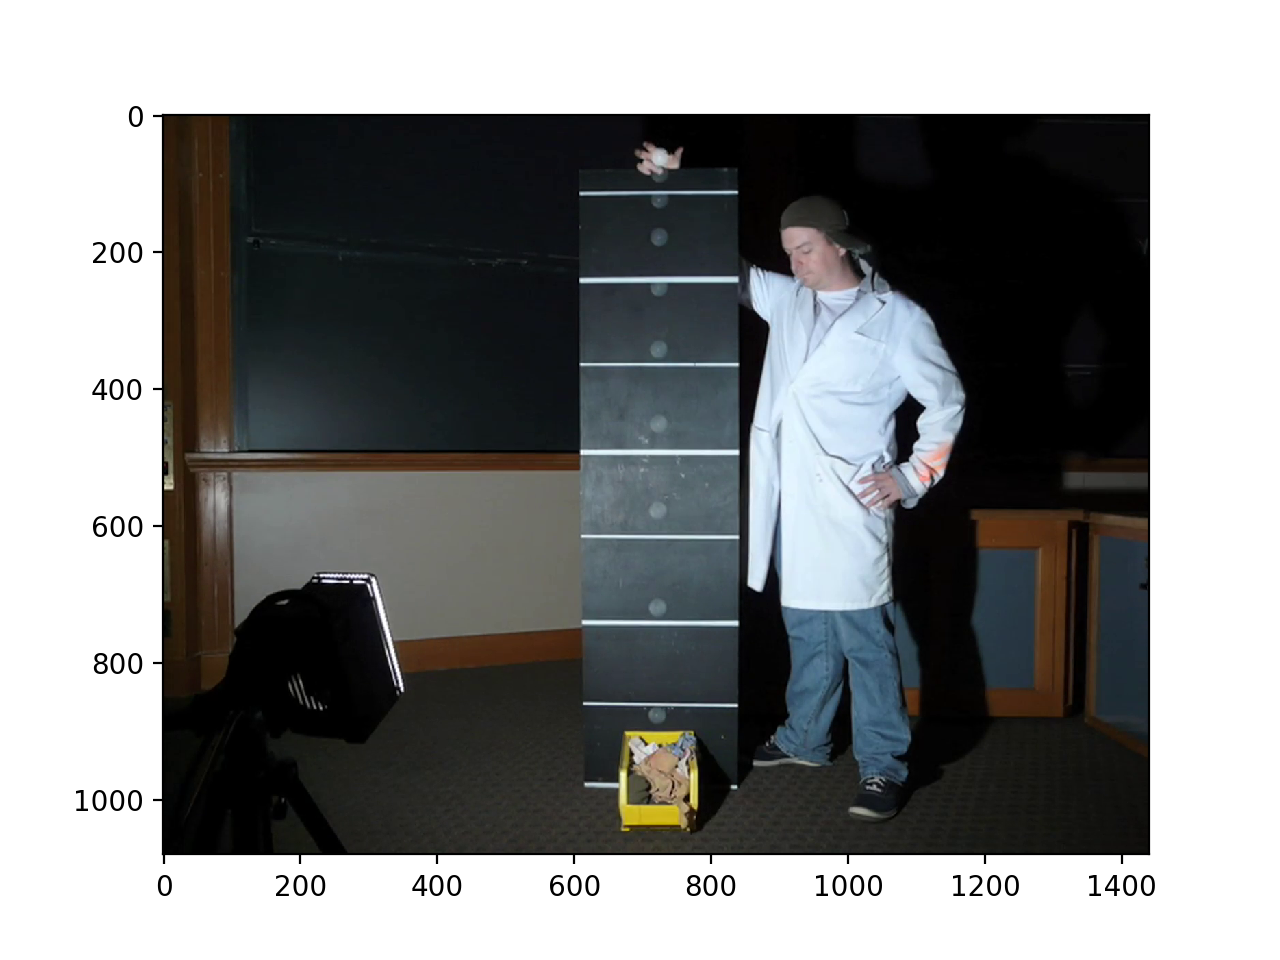

In [38]:
plt.imshow(image)

<IPython.core.display.Javascript object>


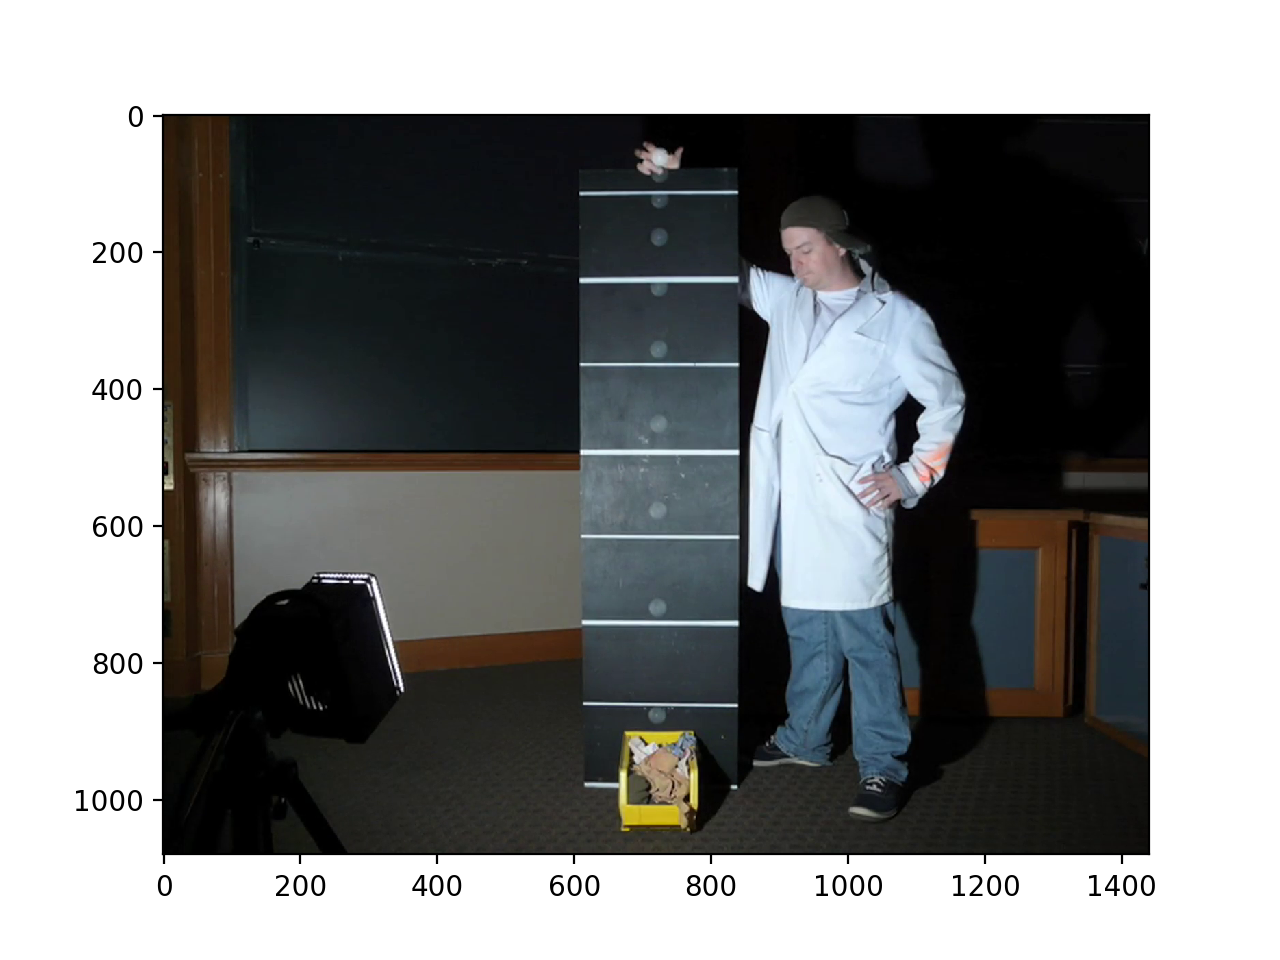

In [39]:
#figure object
fig = plt.figure()

plt.imshow(image)

coords = []

# a weird function associated with interactivity
def onclick(event):
    x = event.xdata # grab click x
    y = event.ydata # grab click y
    coords.append([x,y]) # store x&y values
    
# one more weird call
connectId = fig.canvas.mpl_connect('button_press_event', onclick)

In [40]:
# stop clicking connection
# another weird call
fig.canvas.mpl_disconnect(connectId)

In [41]:
coords

[[773.3073254870129, 116.27353896103887],
 [770.3852475649351, 239.0008116883115],
 [770.3852475649351, 361.72808441558425],
 [782.0735592532467, 493.22159090909076],
 [779.1514813311688, 615.9488636363635],
 [776.2294034090909, 744.5202922077922],
 [770.3852475649351, 858.481331168831],
 [787.9177150974026, 987.0527597402597]]

In [43]:
y_lines = np.array(coords)[:,1]
y_lines

array([116.27353896, 239.00081169, 361.72808442, 493.22159091,
       615.94886364, 744.52029221, 858.48133117, 987.05275974])

In [49]:
dy = np.roll(y_lines,-1) - y_lines
dy

array([ 122.72727273,  122.72727273,  131.49350649,  122.72727273,
        128.57142857,  113.96103896,  128.57142857, -870.77922078])

In [50]:
pixels_to_meters = 0.25/dy[:-1].mean()
pixels_to_meters

0.002009694258016406

In [51]:
dy[:-1]

array([122.72727273, 122.72727273, 131.49350649, 122.72727273,
       128.57142857, 113.96103896, 128.57142857])

<IPython.core.display.Javascript object>


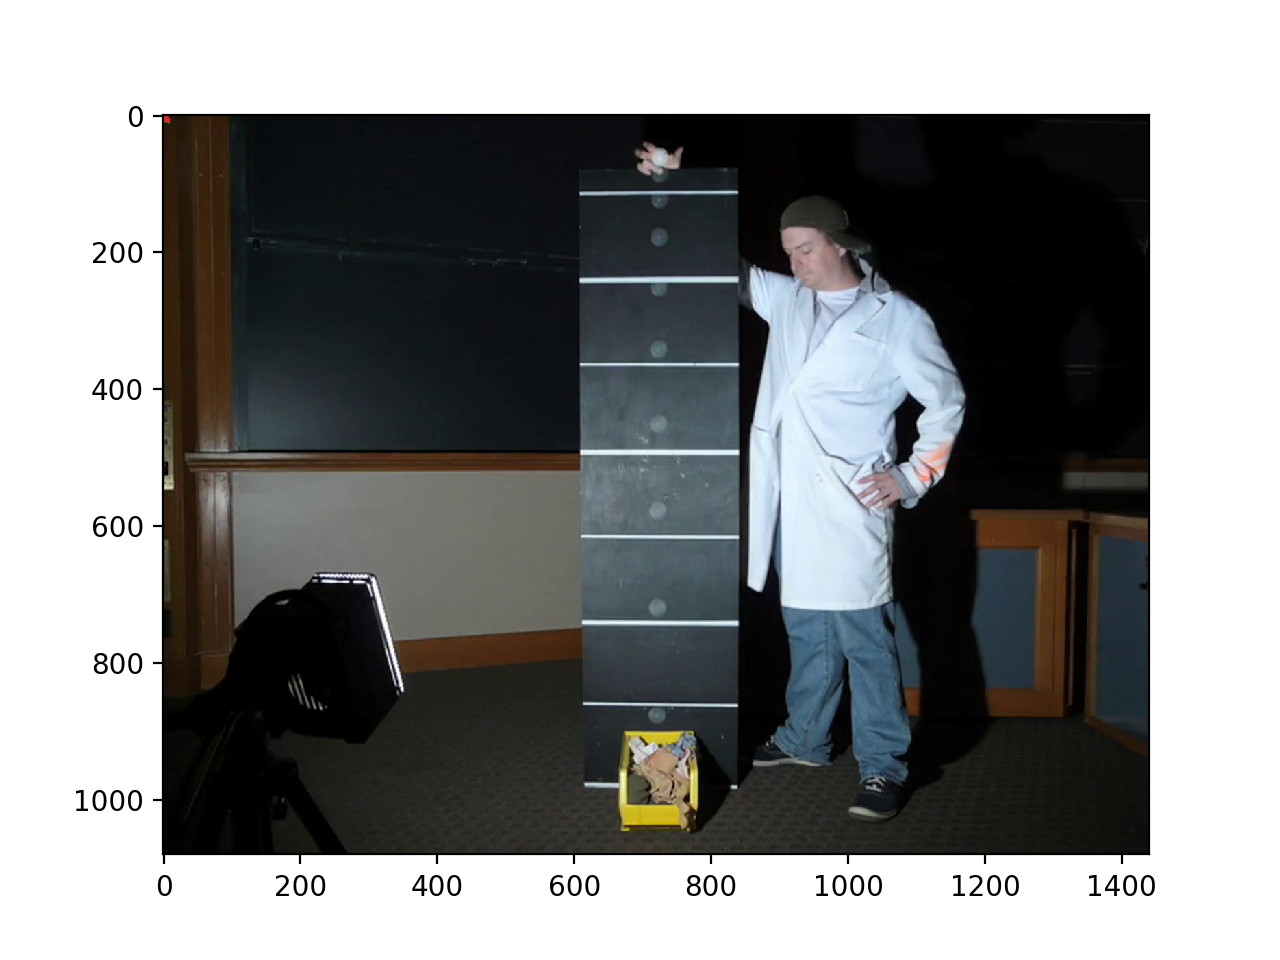

In [53]:
#figure object
fig = plt.figure()

plt.imshow(image)

ball_coords = []

# a weird function associated with interactivity
def onclick(event):
    x = event.xdata # grab click x
    y = event.ydata # grab click y
    ball_coords.append([x,y]) # store x&y values
    
# one more weird call
connectId = fig.canvas.mpl_connect('button_press_event', onclick)

In [54]:
fig.canvas.mpl_disconnect(connectId)

In [55]:
ball_coords

[[723.6320008116883, 59.47564935064929],
 [723.6320008116883, 91.6185064935064],
 [726.5540787337662, 126.68344155844147],
 [726.5540787337662, 182.20292207792204],
 [723.6320008116883, 255.25487012987003],
 [720.7099228896104, 345.83928571428555],
 [720.7099228896104, 453.9561688311687],
 [720.7099228896104, 579.6055194805193],
 [720.7099228896104, 719.8652597402596],
 [720.7099228896104, 880.5795454545454]]

In [56]:
y_ball = np.array(ball_coords)[:,1]

In [57]:
y_ball

array([ 59.47564935,  91.61850649, 126.68344156, 182.20292208,
       255.25487013, 345.83928571, 453.95616883, 579.60551948,
       719.86525974, 880.57954545])

## Questions
If you have ball coordinates - how would you convert these to meters from pixels?  (Your y-coordinates)

If you have that - how would you turn that into velocities?

Accelerations?

You will need that $\Delta t$ between timesteps is 1/16.8 seconds

In [60]:
# lets get the change in position of the ball y-values
# and convert them into meters
# dy = np.roll(y_lines,-1) - y_lines

dy_ball = (np.roll(y_ball,-1) - y_ball)*pixels_to_meters
dy_ball[:-1]

array([0.06459732, 0.0704698 , 0.11157718, 0.14681208, 0.18204698,
       0.21728188, 0.25251678, 0.28187919, 0.32298658])

In [61]:
dt = 1./16.8 # seconds

In [63]:
velocity = dy_ball[:-1]/dt
velocity

array([1.0852349 , 1.18389262, 1.87449664, 2.46644295, 3.05838926,
       3.65033557, 4.24228188, 4.73557047, 5.4261745 ])

In [64]:
dvball = np.roll(velocity,-1) - velocity
dvball

array([ 0.09865772,  0.69060403,  0.59194631,  0.59194631,  0.59194631,
        0.59194631,  0.49328859,  0.69060403, -4.3409396 ])

In [65]:
acceleration = dvball[:-1]/dt
acceleration

array([ 1.65744966, 11.60214765,  9.94469799,  9.94469799,  9.94469799,
        9.94469799,  8.28724832, 11.60214765])

In [66]:
acceleration.mean()

9.115973154362425

# plotting ellipses

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
theta = np.arange(0, 2*np.pi, 0.001)
theta, theta.shape

(array([0.000e+00, 1.000e-03, 2.000e-03, ..., 6.281e+00, 6.282e+00,
        6.283e+00]), (6284,))

In [79]:
# let's specify eccentricity and semi major axis
a = 5
ecc = 0.5

In [80]:
r = (a*(1-ecc**2))/(1 - ecc*np.cos(theta))
r

array([7.5       , 7.49999625, 7.499985  , ..., 7.49998209, 7.49999473,
       7.49999987])

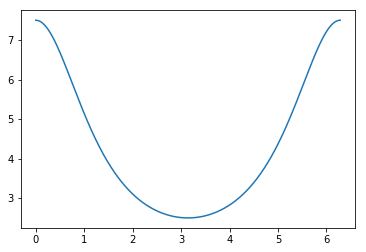

In [81]:
plt.plot(theta, r)
plt.show()

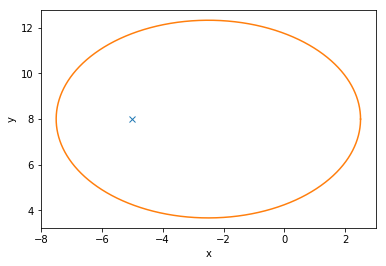

In [89]:
# centered at -5, 8
x0 = -5
y0 = 8

x = r*np.cos(theta)+x0
y = r*np.sin(theta)+y0

plt.plot(x0,y0, 'x')

#plt.xlim(-8, 8)
#plt.ylim(-8, 8)

plt.xlabel('x')
plt.ylabel('y')

plt.plot(x,y)
plt.show()

## In the next few minutes:
1. plot an ellipse centered at (-5, 5) with major axis of 10, minor axis of 5

Try calculating the area of your ellipse.

Extra step: Try calculating the orbit of a parabola with a foci of (-5,5)